In [1]:
#import Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_csv("C:\\Users\\nitya\\OneDrive\\Documents\\data science internship\\stock market prediction dataset.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [7]:
# convert the data of string type to datetime
df['Date']=pd.to_datetime(df['date'])
print(type(df.date[0]))

<class 'str'>


In [8]:
#sort date data
df=df.sort_values(by='date')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Date
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0,2015-05-27 00:00:00+00:00
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,2015-05-28 00:00:00+00:00
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,2015-05-29 00:00:00+00:00
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,2015-06-01 00:00:00+00:00
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,2015-06-02 00:00:00+00:00


In [9]:
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Date
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0,2015-05-27 00:00:00+00:00
1,1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,2015-05-28 00:00:00+00:00
2,2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,2015-05-29 00:00:00+00:00
3,3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,2015-06-01 00:00:00+00:00
4,4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,2015-06-02 00:00:00+00:00


In [11]:
df_close=df['close']

Text(0.5, 1.0, 'Stock prediction')

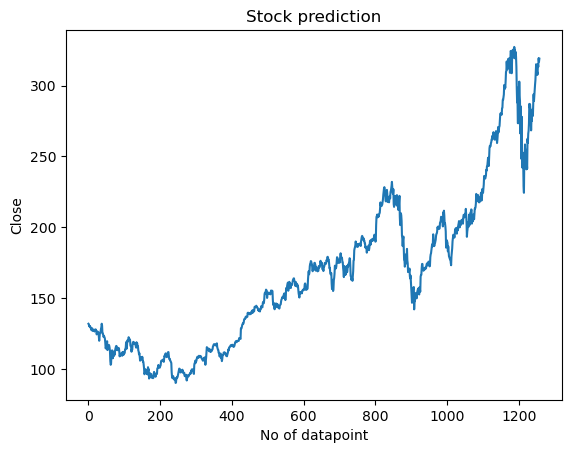

In [12]:
plt.plot(df_close)  
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')

In [13]:
## we need to scale the data as LSTM are sensitive to the scale of the data.
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ##Here i=0 to 100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 24s 699ms/step - loss: 0.0781 - accuracy: 0.0014 - val_loss: 0.1459 - val_accuracy: 0.0000e+00
Epoch 2/60
11/11 [==============================] - 5s 455ms/step - loss: 0.0289 - accuracy: 0.0014 - val_loss: 0.0448 - val_accuracy: 0.0000e+00
Epoch 3/60
11/11 [==============================] - 5s 439ms/step - loss: 0.0214 - accuracy: 0.0014 - val_loss: 0.0435 - val_accuracy: 0.0000e+00
Epoch 4/60
11/11 [==============================] - 5s 410ms/step - loss: 0.0204 - accuracy: 0.0014 - val_loss: 0.0378 - val_accuracy: 0.0000e+00
Epoch 5/60
11/11 [==============================] - 5s 447ms/step - loss: 0.0192 - accuracy: 0.0014 - val_loss: 0.0403 - val_accuracy: 0.0000e+00
Epoch 6/60
11/11 [==============================] - 5s 443ms/step - loss: 0.0190 - accuracy: 0.0014 - val_loss: 0.0403 - val_accuracy: 0.0000e+00
Epoch 7/60
11/11 [==============================] - 5s 436ms/step - loss: 0.0186 - accuracy: 0.0014 - val_loss: 0.0342 - va

In [21]:
## Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 1s 81ms/step


In [22]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.013705653531196455

In [23]:
#R-Square
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)

0.99

In [24]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_test, test_predict))

0.030409611750360582

In [25]:
#R-Square
np.round(metrics.r2_score(y_test, test_predict),2)

0.97

In [26]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

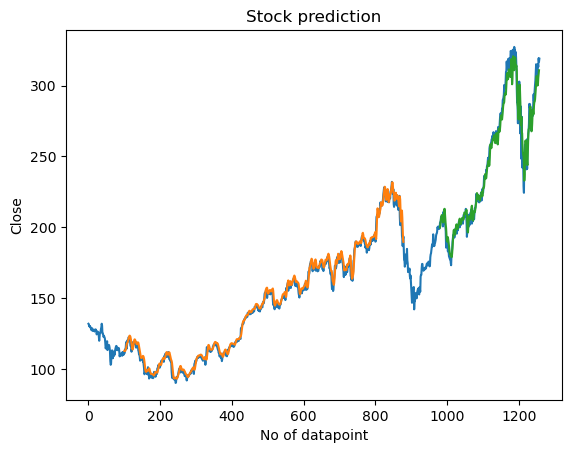

In [27]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')
plt.show()

In [28]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 0)

In [29]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()